# Telco Customer Churn - Focused Customer retention 

## 4.0 Artificial Neural Network (Section 4)

In [16]:
import pandas as pd # imported to load and manipulate data
import tensorflow # imported for deep learning tasks
import keras # imported for deep learning tasks
import matplotlib.pyplot as plt # imported for data visualisation functions
import numpy as np # imported for additional maths and stats functions
import warnings
warnings.filterwarnings("ignore") #suppresses warnings in the notebook. 
# warnings.resetwarnings() #commented line can be run to re-enable warnings.
#%pdb #enable or disable automatic activation of the debugger when exceptions occur.

#importing ML libraries for Deep Learning analysis 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

### 4.1 Data Preprocessing & Encoding

In [17]:
# Directory created for Jupyter Notebook for logistiv regression analysis.
# Notebook runs from same space all other paths are relative to 
# datafile addressed from the same space.

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(file_path)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # data-cleansing
data_cleaned = data.dropna(subset=['TotalCharges'])

# Converting variables into dummy variables and setting 'Churn' to target variable
X = pd.get_dummies(data_cleaned.drop(['Churn', 'customerID'], axis=1))
y = data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

### 4.2 Neural Network Model Setup & Training

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculating class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Initialising the ANN model
model = Sequential([
    Dense(units=32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with class weights
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, class_weight=class_weight_dict)

Epoch 1/500
154/154 [==============================] - 0s 294us/step - loss: 0.6043 - accuracy: 0.6889
Epoch 2/500
154/154 [==============================] - 0s 277us/step - loss: 0.5317 - accuracy: 0.7091
Epoch 3/500
154/154 [==============================] - 0s 276us/step - loss: 0.5082 - accuracy: 0.7233
Epoch 4/500
154/154 [==============================] - 0s 292us/step - loss: 0.4973 - accuracy: 0.7334
Epoch 5/500
154/154 [==============================] - 0s 285us/step - loss: 0.4911 - accuracy: 0.7353
Epoch 6/500
154/154 [==============================] - 0s 278us/step - loss: 0.4872 - accuracy: 0.7412
Epoch 7/500
154/154 [==============================] - 0s 274us/step - loss: 0.4844 - accuracy: 0.7428
Epoch 8/500
154/154 [==============================] - 0s 276us/step - loss: 0.4816 - accuracy: 0.7471
Epoch 9/500
154/154 [==============================] - 0s 289us/step - loss: 0.4793 - accuracy: 0.7511
Epoch 10/500
154/154 [==============================] - 0s 260us/step - l

### 4.3 Model Prediction & Testing 

#### 4.3.1 Classification Report

In [19]:
# Predictions using the test data
y_pred_probs = model.predict(X_test_scaled)
y_pred = [0 if val < 0.5 else 1 for val in y_pred_probs]

# Evaluating the model
print(classification_report(y_test, y_pred))

66/66 [==============================] - 0s 231us/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1549
           1       0.51      0.65      0.57       561

    accuracy                           0.74      2110
   macro avg       0.69      0.71      0.69      2110
weighted avg       0.77      0.74      0.75      2110



#### 4.3.2 ROC Curve 

66/66 [==============================] - 0s 218us/step


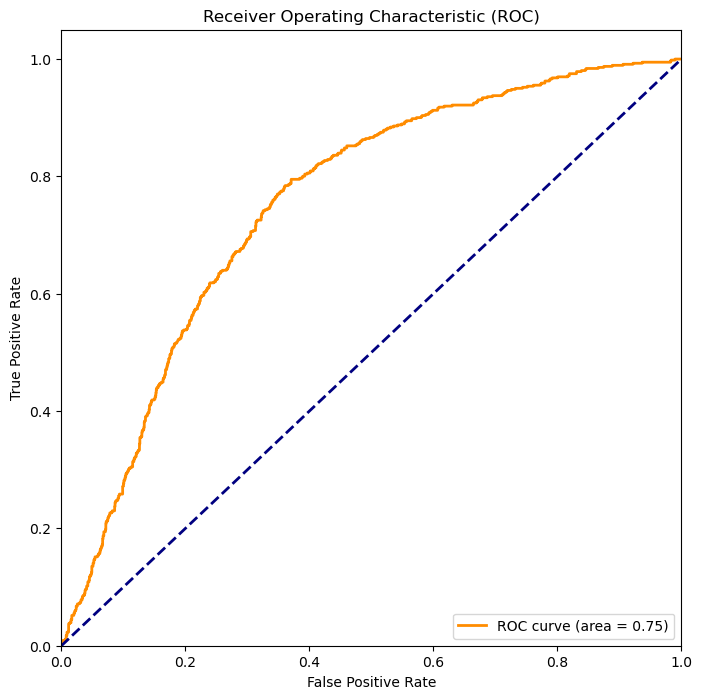

In [23]:
from sklearn.metrics import roc_curve, auc

# Predicting probabilities
y_pred_probs = model.predict(X_test_scaled).ravel()

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### [additional analysis (not covered in report)] Model Accuracy/Loss & 2-class Precision-Recall Curve

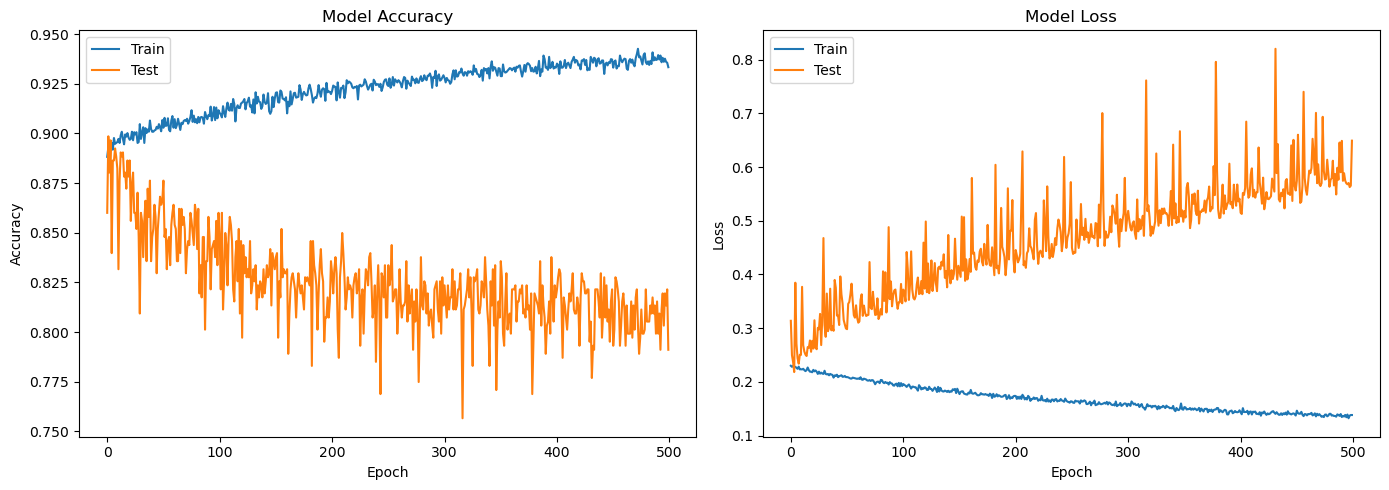

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, class_weight=class_weight_dict, validation_split=0.1, verbose=0)  

# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


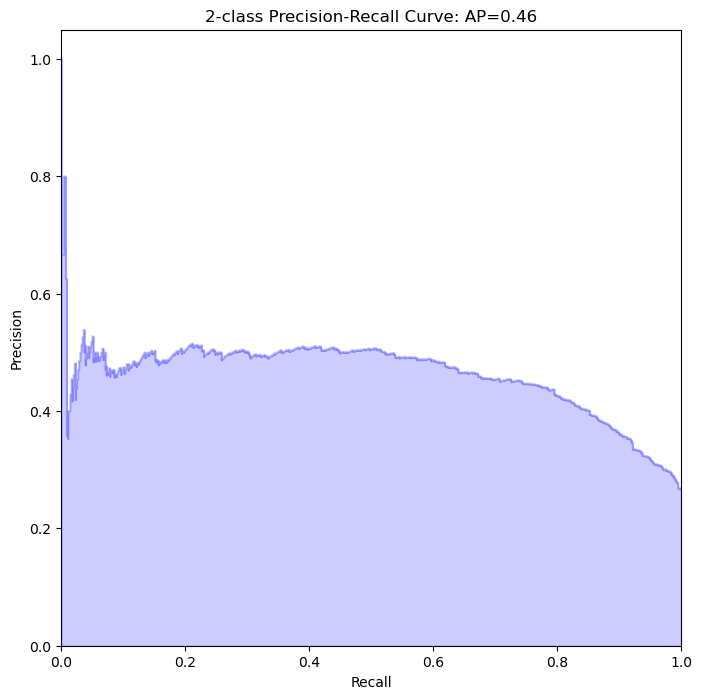

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculating the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
average_precision = average_precision_score(y_test, y_pred_probs)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()